<a href="https://colab.research.google.com/github/wndnjs2037/2022_BigDataProgramming/blob/main/project/2011_2020_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EB%B2%94%EC%A3%84_%EB%B0%9C%EC%83%9D%EA%B1%B4_%EC%88%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2011 - 2022 서울시 범죄 발생 건수 막대그래프
# 5대 범죄로 나누어서 분류 : 5대범죄 - 살인, 강도, 강간/강제추행, 절도, 폭력


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

In [4]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/2011-2022 서울시 범죄발생현황(전쳬).csv", encoding='cp949')
df.head(5)

,division,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,살인 전체,513,348,300,307,320,288,278,266,252,265
1,강도 전체,1984,1188,875,708,571,543,343,296,279,283
2,"강간, 강제추행 전체",7169,6722,2956,2642,2333,2627,2708,2801,2928,3062
3,절도 전체,108577,122640,123150,118755,110579,93655,82270,78295,84325,76487
4,폭력 전체,92009,90512,83539,83582,83383,72730,67135,63263,61624,54313


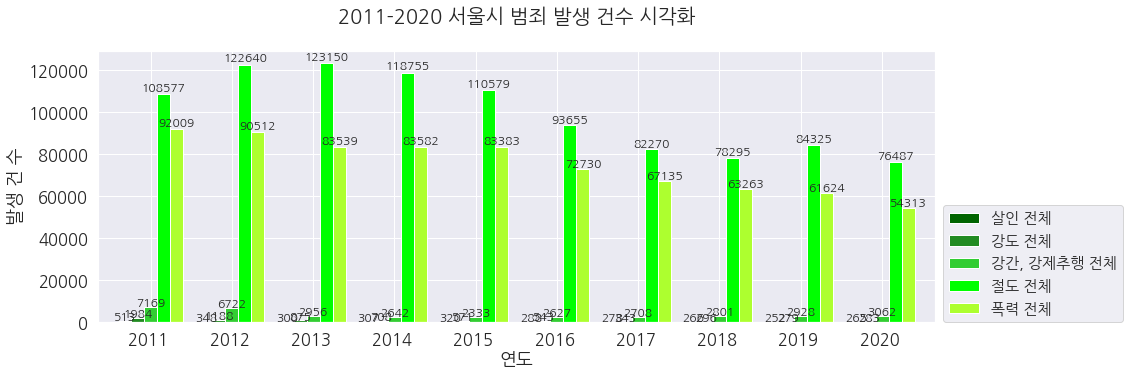

In [9]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/2011-2022 서울시 범죄발생현황(전쳬).csv", encoding='cp949')

df = df.set_index('division') 
df = df.transpose() 

colors = ['darkgreen','forestgreen','limegreen','lime','greenyellow'] #색상 지정
df = df.plot(kind='bar', figsize=(15,5), rot=0, color=colors, width=0.8)
plt.title("2011-2020 서울시 범죄 발생 건수 시각화\n", fontsize=20)

for p in df.patches: #막대그래프 개수만큼 반복
    left, bottom, width, height = p.get_bbox().bounds
    df.annotate("%.0f" %(height), (left+width/2, height*1.01), ha='center', fontsize=12) #값 표시

plt.xlabel('연도')
plt.ylabel('발생 건 수')
plt.legend(loc=(1.01,0), fontsize=15)

df

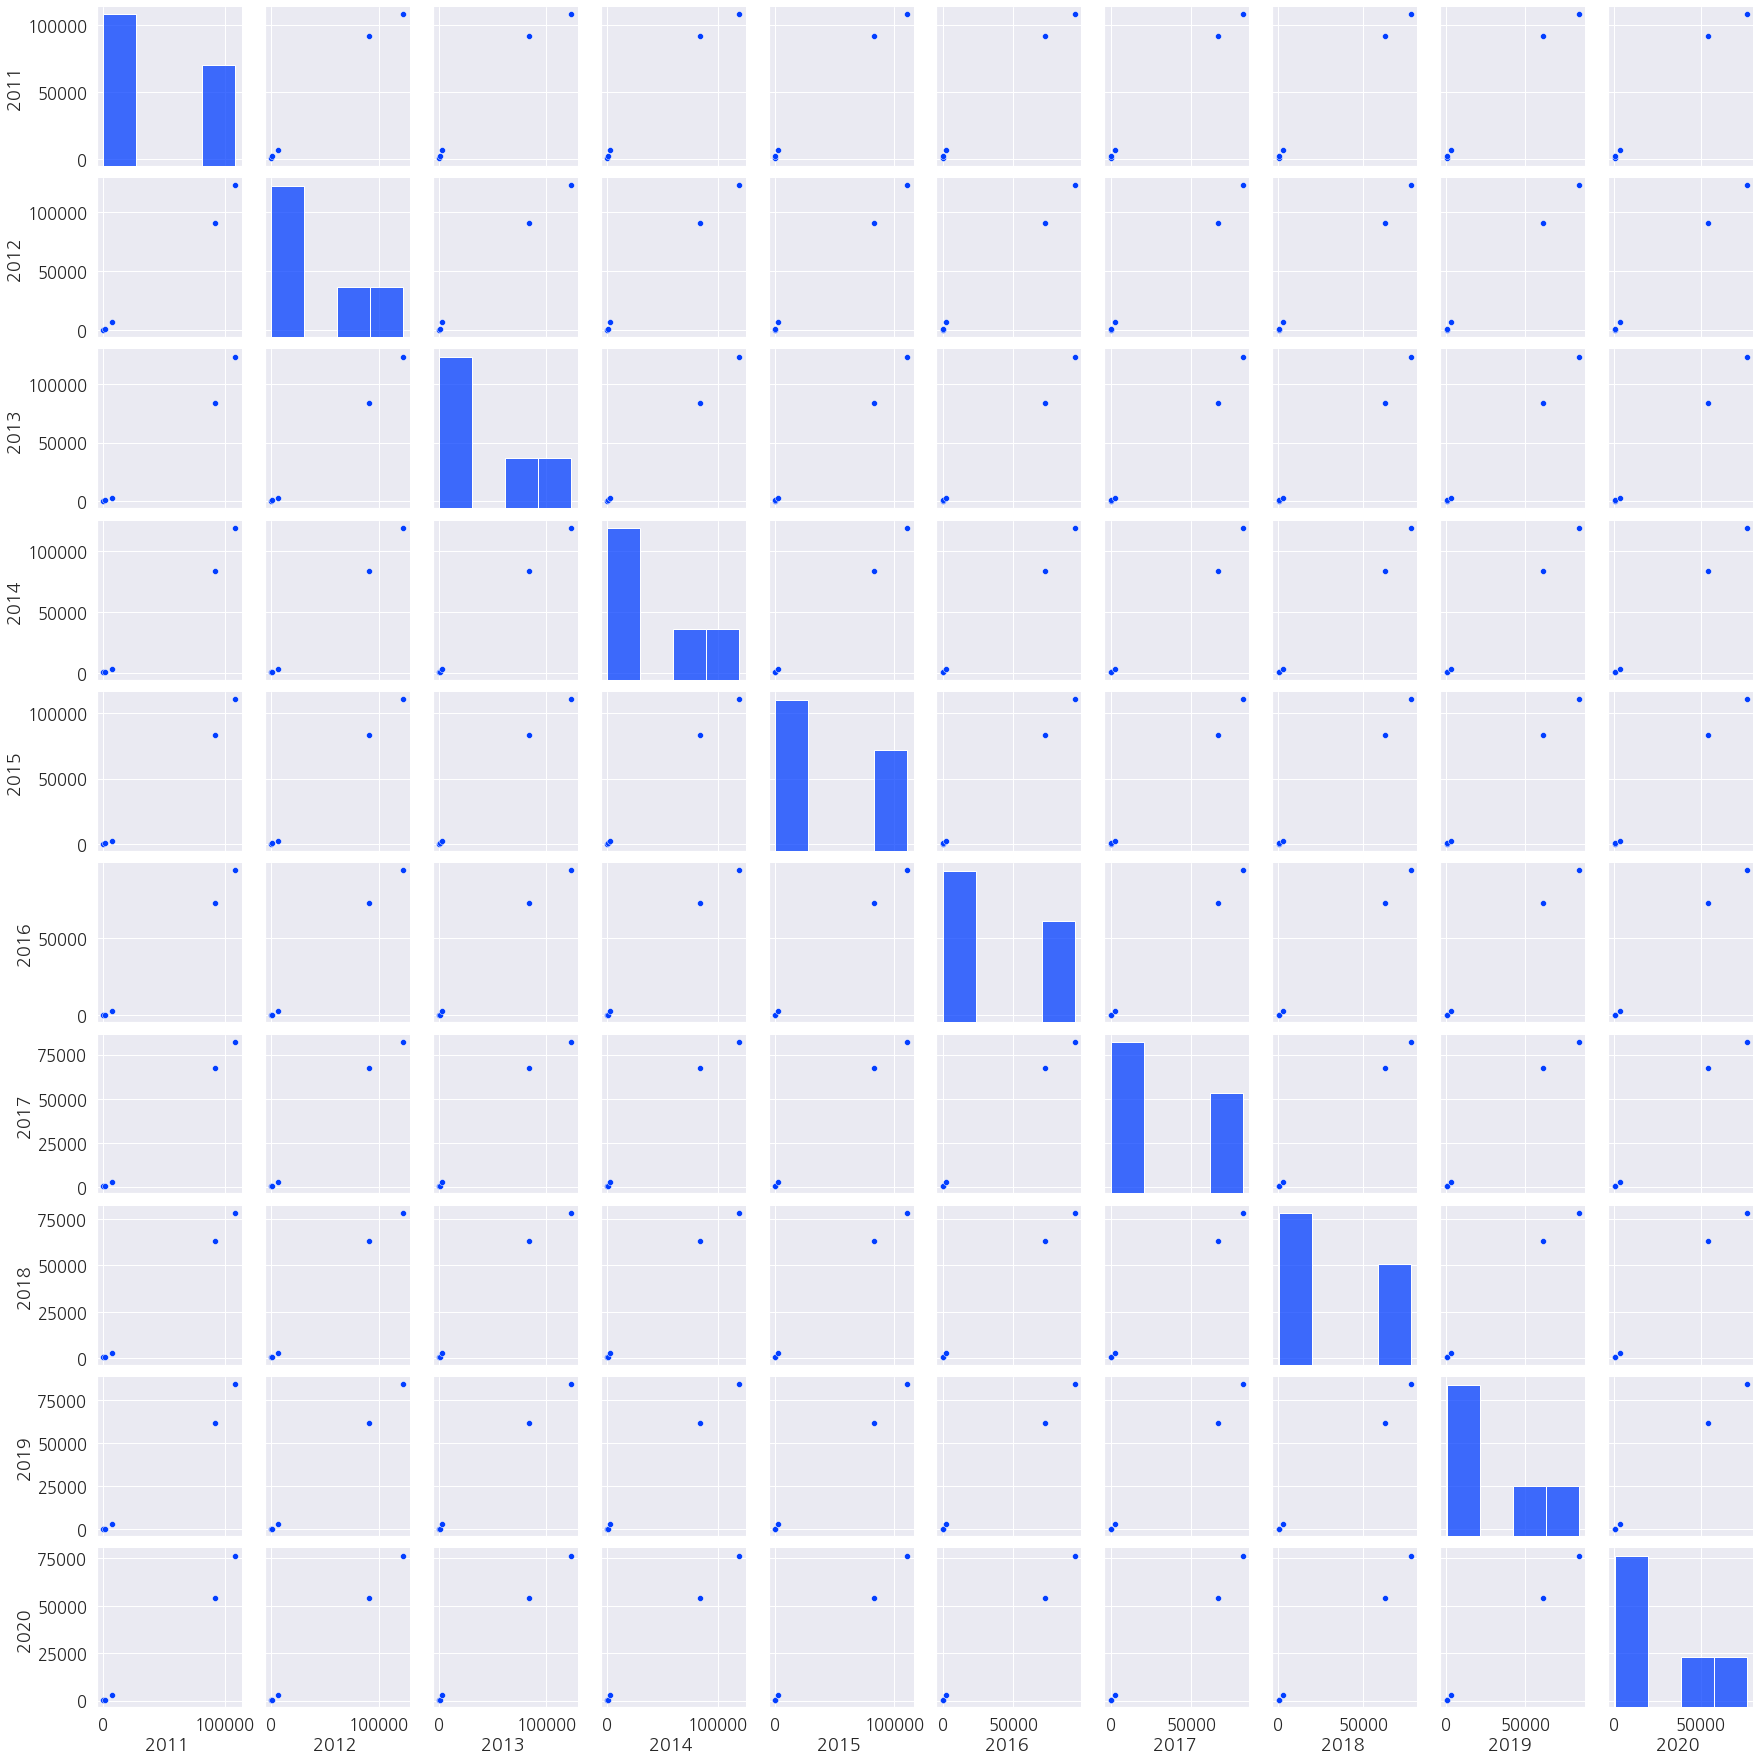

In [12]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/2011-2022 서울시 범죄발생현황(전쳬).csv", encoding='cp949')
sns.pairplot(df)

In [5]:
# 상대적으로 가벼운 범죄인 절도가 가장 높은 건수로 발생되고 있고, 그 다음으로는 폭력 건수가 가장 많으며, 큰 데이터 차이로 강간, 강도, 살인 순으로 범죄가 일어나고 있습니다.
# 2010년도 초중반에는 범죄건수의 발생이 많았지만, 최근 들어서는 점점 줄어들고 있는 추세입니다.
